In [12]:
# 'pandas': Das Standard-Werkzeug für Tabellenkalkulation (wie Excel in Code).
# Wir kürzen es als 'pd' ab.
import pandas as pd

# 'matplotlib.pyplot': Die Standard-Bibliothek zum Zeichnen von Graphen.
# Kürzel 'plt'.
import matplotlib.pyplot as plt

# 'numpy': Für mathematische Operationen und spezielle Werte wie 'NaN' (Not a Number/Null).
import numpy as np

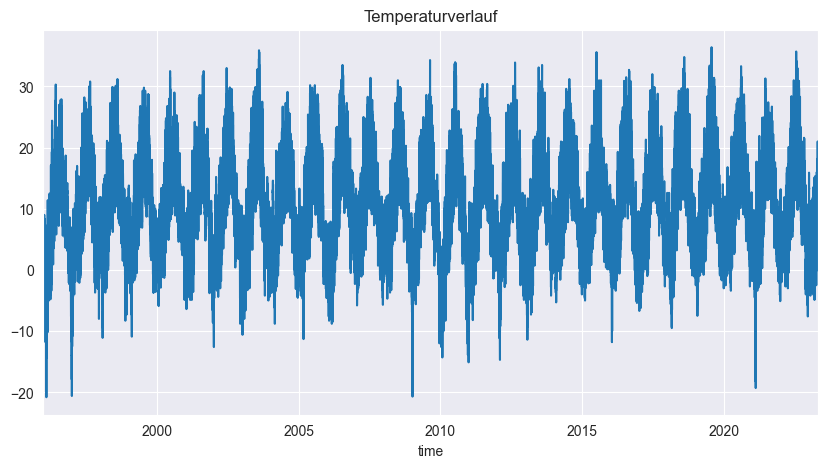

In [13]:
# 1. CSV laden
# Der DataFrame 'df' ist deine Tabelle im Arbeitsspeicher.
df = pd.read_csv('herford_weather.csv')

# 2. Typkonvertierung (Casting)
# Die Spalte 'Date Time' ist aktuell noch Text (String/Object).
# Wir wandeln sie explizit in datetime-Objekte um (<M8[ns] ist der interne Numpy-Code dafür).
df['time'] = pd.to_datetime(df['time'])

# 3. Indexierung
# Wir setzen das Datum als Index (wie ein Primary Key in SQL).
# Das ermöglicht uns später den Zugriff über df.loc['2022-01-01'].
# inplace=True bedeutet: Wir ändern das Objekt direkt, statt eine Kopie zurückzugeben.
df.set_index('time', inplace=True)

# 4. Plotten
# Wir greifen auf die Spalte (Series) zu und rufen deren .plot() Methode auf.
df['temperature_2m (°C)'].plot(figsize=(10, 5), title="Temperaturverlauf")
plt.show() # Zeigt das gezeichnete Bild an

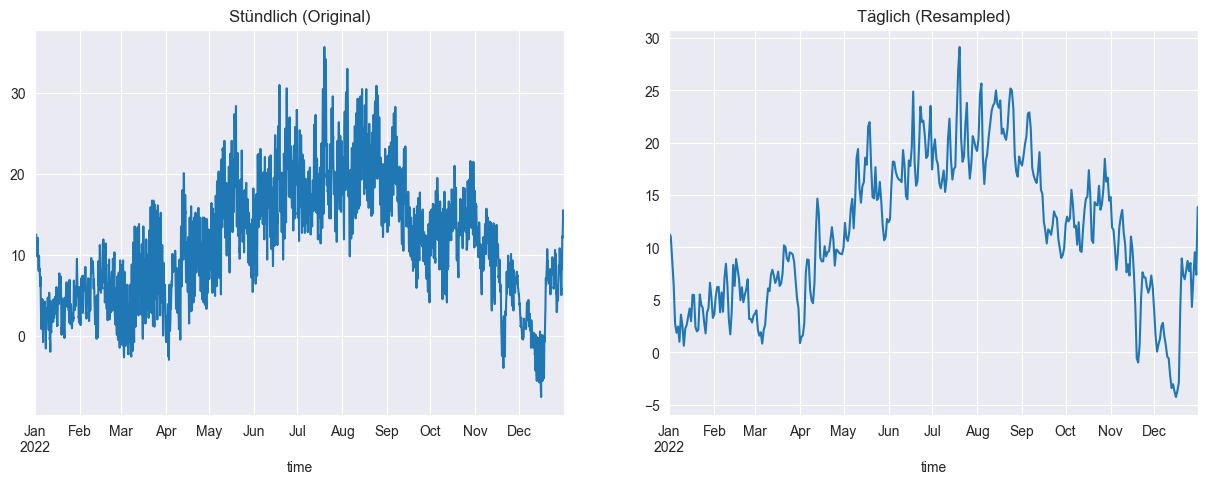

In [14]:
# 1. Filtern (Slicing)
# Dank des Zeit-Index können wir Strings nutzen, um Zeiträume zu wählen.
# .loc[] ist der Zugriff über Labels (hier das Datum).
df_2022 = df.loc['2022']  # Wählt alle Zeilen des Jahres 2022

# 2. Resampling (Neuabtastung)
# .resample('D') gruppiert die Daten in Tages-Buckets ('D' = Daily).
# .mean() berechnet den Durchschnitt für jeden Bucket.
# Das Ergebnis 'df_daily' hat nun nur noch 365 Zeilen (eine pro Tag).
df_daily = df_2022.resample('D').mean()

# 3. Visualisierung (Subplots)
# Erstellt eine "Leinwand" (fig) mit 2 Koordinatensystemen (ax1, ax2) nebeneinander.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Wir sagen dem Plot-Befehl explizit, auf welche Achse (ax) er zeichnen soll.
df_2022['temperature_2m (°C)'].plot(ax=ax1, title="Stündlich (Original)")
df_daily['temperature_2m (°C)'].plot(ax=ax2, title="Täglich (Resampled)")

plt.show()

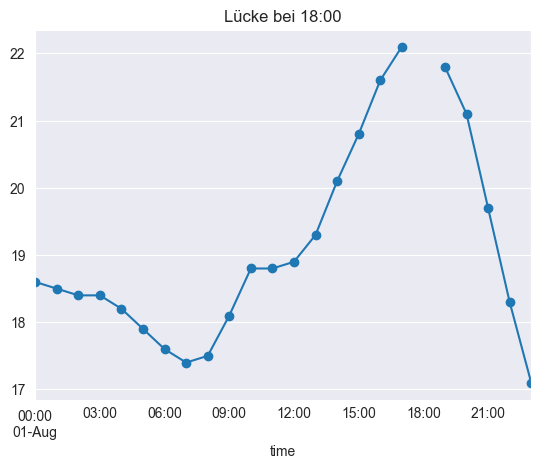

In [15]:
# .copy() ist WICHTIG!
# In Python sind Variablen oft nur Referenzen (Pointer). Ohne .copy()
# würden wir im Original 'df' rumpfuschen. Wir wollen aber eine Arbeitskopie.
df_august = df.loc['2022-08-01'].copy()

# Wir greifen auf eine spezifische Zelle zu: Zeile (Zeitpunkt), Spalte (Name).
# np.nan ist der Standardwert für "Fehlender Wert" (Float-Typ).
df_august.loc['2022-08-01 18:00:00', 'temperature_2m (°C)'] = np.nan

# Plot zeigt nun eine unterbrochene Linie.
df_august['temperature_2m (°C)'].plot(marker='o', title="Lücke bei 18:00")
plt.show()

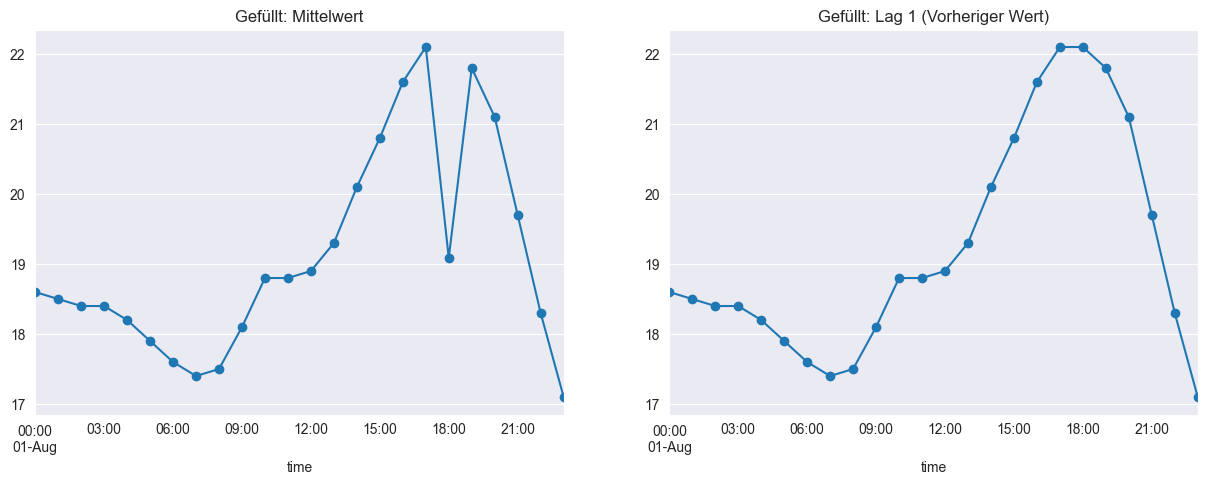

In [16]:
# --- Methode A: Globaler Mittelwert (Aufgabe 2c) ---
# Berechnet den Durchschnitt aller validen Werte dieses Tages.
# NaNs werden bei .mean() automatisch ignoriert.
tages_mittelwert = df_august['temperature_2m (°C)'].mean()

# .fillna() sucht alle NaNs und ersetzt sie mit dem übergebenen Wert (Skalar).
df_filled_mean = df_august.fillna(tages_mittelwert)


# --- Methode B: Forward Fill / Lag 1 (Aufgabe 2d) ---
# .ffill() steht für "Forward Fill".
# Es nimmt den letzten gültigen Wert (von 17:00) und schreibt ihn in die Lücke (18:00).
# Das ist bei Zeitreihen oft realistischer als der Tagesdurchschnitt.
df_filled_lag = df_august.ffill()

# Kurzer Plot zum Vergleich
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
df_filled_mean['temperature_2m (°C)'].plot(ax=ax1, marker='o', title="Gefüllt: Mittelwert")
df_filled_lag['temperature_2m (°C)'].plot(ax=ax2, marker='o', title="Gefüllt: Lag 1 (Vorheriger Wert)")
plt.show()

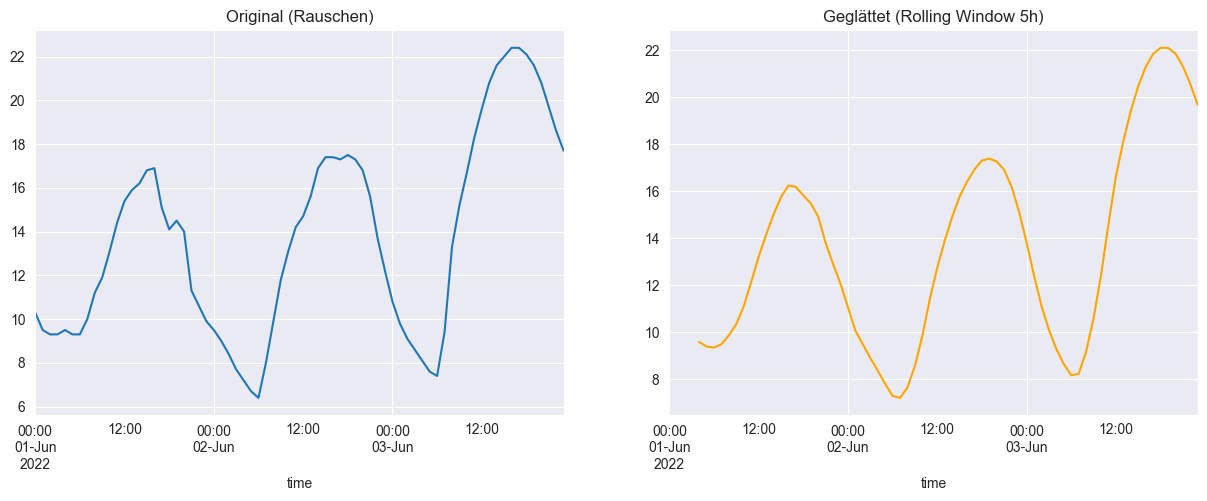

In [17]:
# 1. Datenbereich kopieren
df_juni = df.loc['2022-06-01':'2022-06-03'].copy()

# 2. Rolling Window Berechnung
# .rolling(window=5): Erzeugt ein virtuelles Fenster von 5 Zeilen (Stunden).
# .mean(): Berechnet den Durchschnitt innerhalb dieses Fensters.
# Das Ergebnis schreiben wir in eine NEUE Spalte 'smoothed'.
df_juni['smoothed'] = df_juni['temperature_2m (°C)'].rolling(window=5).mean()

# 3. Plotten
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Originaldaten (stark zackig)
df_juni['temperature_2m (°C)'].plot(ax=ax1, title="Original (Rauschen)")

# Geglättete Daten (weicher Kurvenverlauf)
# Hinweis: Die ersten 4 Werte werden fehlen (NaN), da das Fenster min. 5 Werte braucht.
df_juni['smoothed'].plot(ax=ax2, title="Geglättet (Rolling Window 5h)")

plt.show()